In [237]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder , LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score , median_absolute_error

In [238]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv',index_col='car_ID')

In [239]:
data.head(15)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000


In [240]:
data.shape

(205, 25)

In [241]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [242]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [243]:
for col in data.columns :
  length = len(data[col].unique())
  print(f"{col} has a <{length}> different values")
  print(pd.DataFrame(data[col].unique()))

symboling has a <6> different values
   0
0  3
1  1
2  2
3  0
4 -1
5 -2
CarName has a <147> different values
                            0
0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
..                        ...
142               volvo 244dl
143                 volvo 245
144               volvo 264gl
145              volvo diesel
146                 volvo 246

[147 rows x 1 columns]
fueltype has a <2> different values
        0
0     gas
1  diesel
aspiration has a <2> different values
       0
0    std
1  turbo
doornumber has a <2> different values
      0
0   two
1  four
carbody has a <5> different values
             0
0  convertible
1    hatchback
2        sedan
3        wagon
4      hardtop
drivewheel has a <3> different values
     0
0  rwd
1  fwd
2  4wd
enginelocation has a <2> different values
       0
0  front
1   rear
wheelbase has a <53> different values
        0
0    8

# EDA

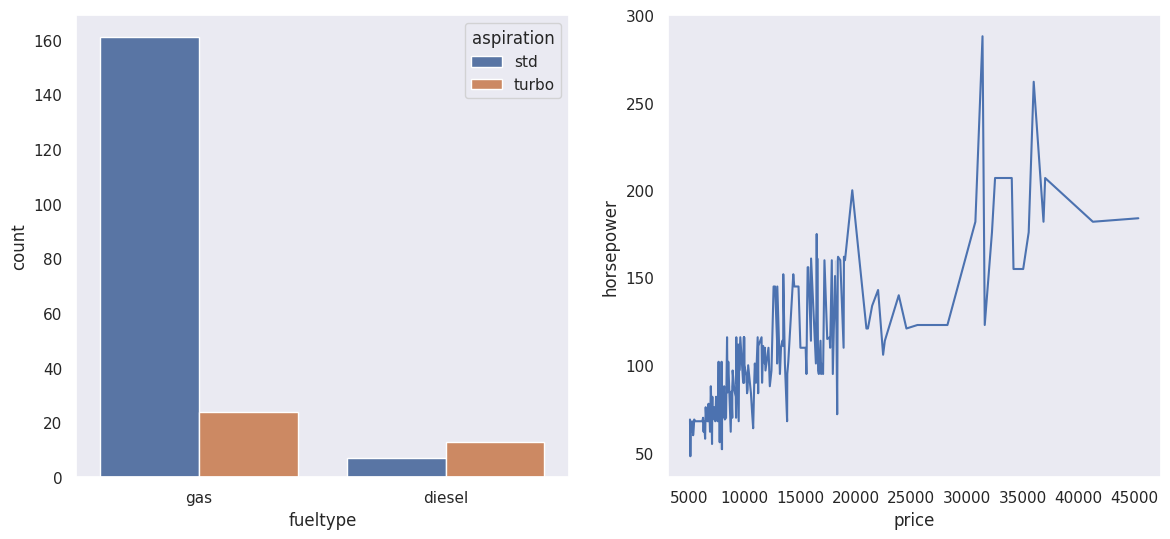

In [244]:
fig ,axes = plt.subplots(1,2,figsize=(14,6))
sns.countplot(data,x='fueltype',hue='aspiration',ax=axes[0])
sns.lineplot(data,x='price',y='horsepower',ax=axes[1])
sns.set_theme(style='dark')
plt.show()

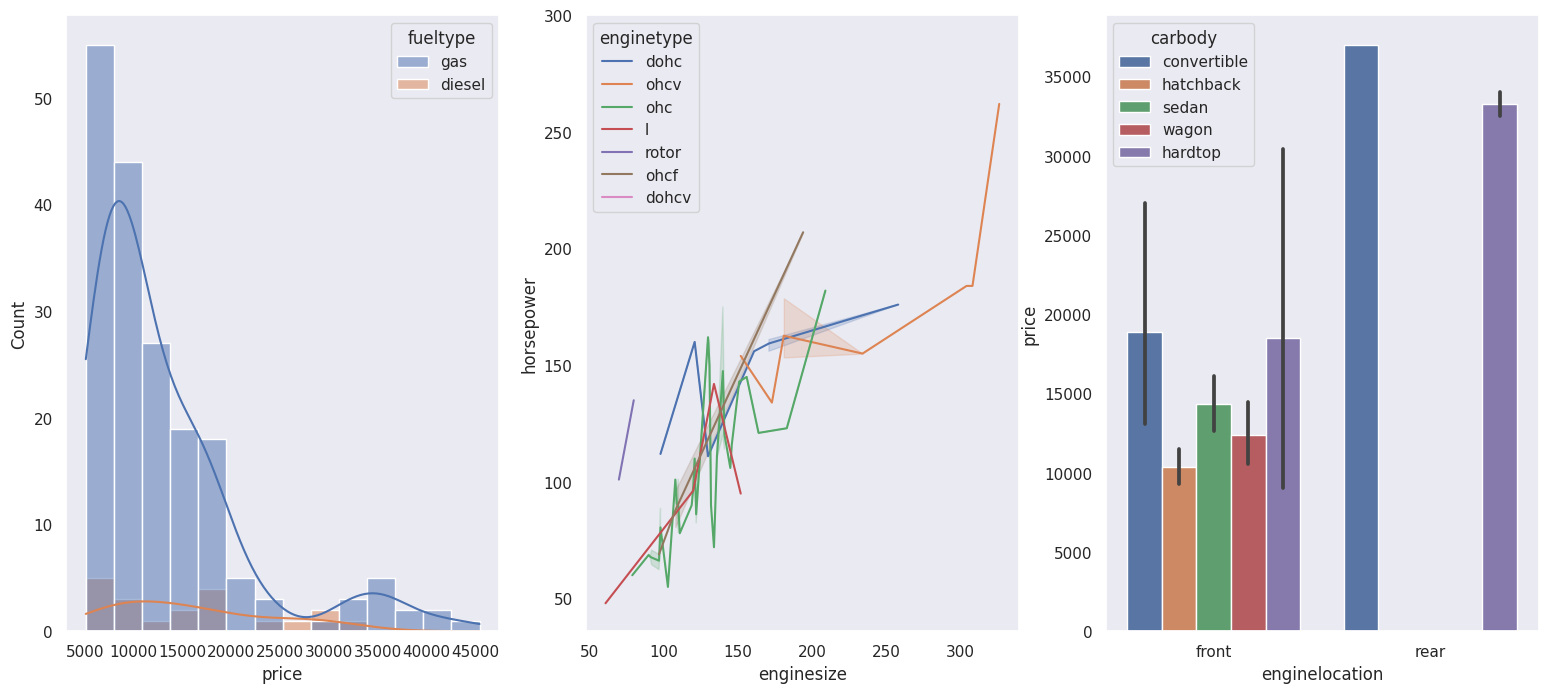

In [245]:
fig , ax = plt.subplots(1,3,figsize=(19,8))
sns.histplot(data,x='price',hue='fueltype',kde=True,ax=ax[0])
sns.lineplot(data,x='enginesize',y='horsepower',hue='enginetype',ax=ax[1])
sns.barplot(data,x='enginelocation',y='price',hue='carbody')
plt.show()

<Axes: xlabel='price', ylabel='doornumber'>

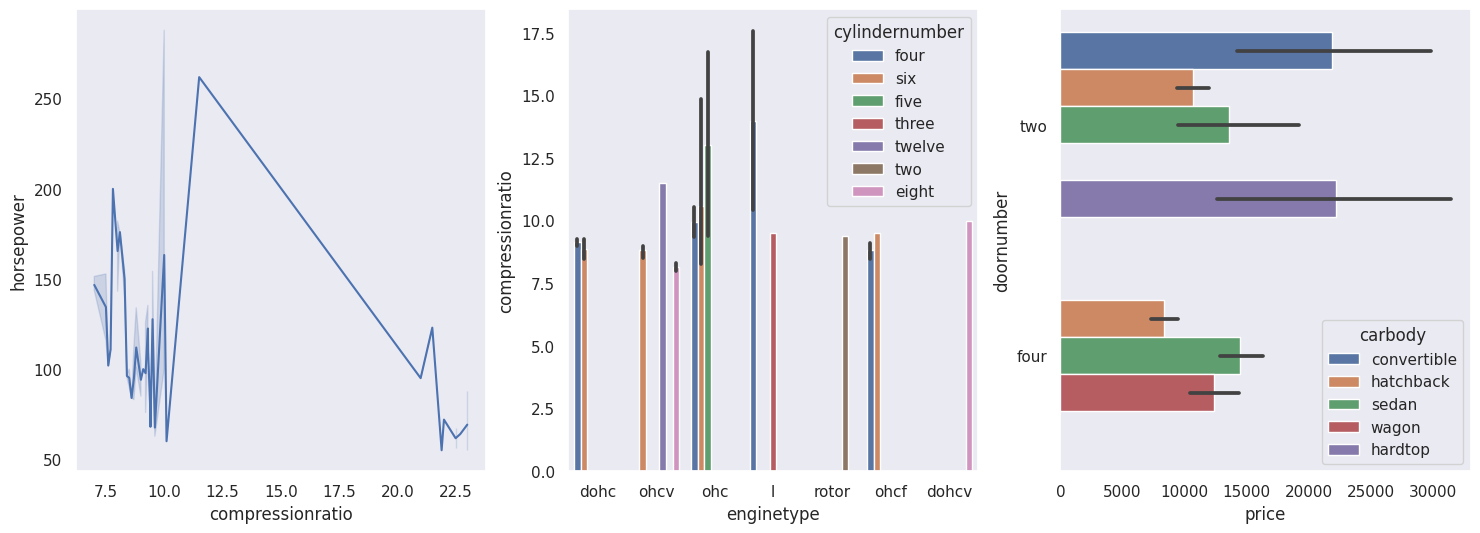

In [246]:
fig , axes = plt.subplots(1,3,figsize=(18,6))
sns.lineplot(data,x='compressionratio',y='horsepower',ax=axes[0])
sns.barplot(data,x='enginetype',y='compressionratio',hue='cylindernumber',ax=axes[1])
sns.barplot(data,x='price',y='doornumber',hue='carbody',ax=axes[2])

<Axes: xlabel='cylindernumber', ylabel='price'>

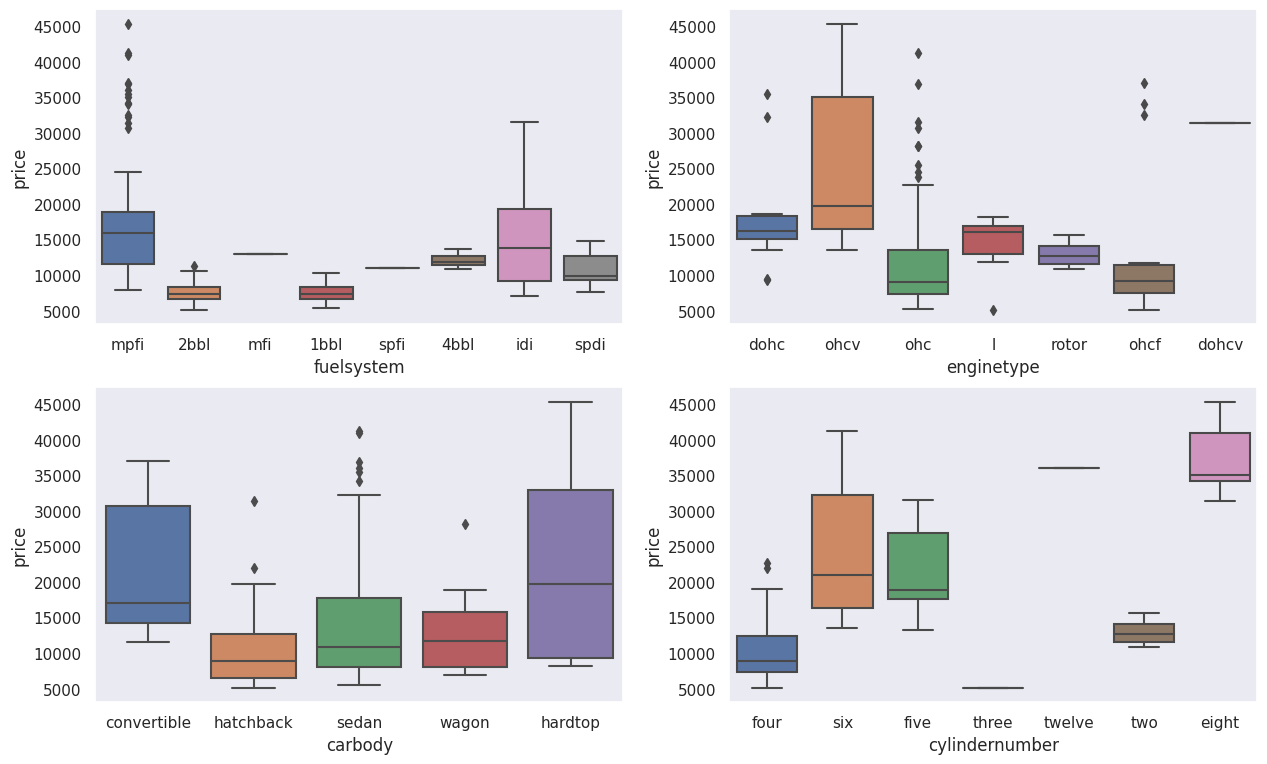

In [247]:
fig , ax = plt.subplots(2,2,figsize=(15,9))
sns.boxplot(data,x='fuelsystem',y='price',ax=ax[0,0])
sns.boxplot(data,x='enginetype',y='price',ax=ax[0,1])
sns.boxplot(data,x='carbody',y='price',ax=ax[1,0])
sns.boxplot(data,x='cylindernumber',y='price',ax=ax[1,1])

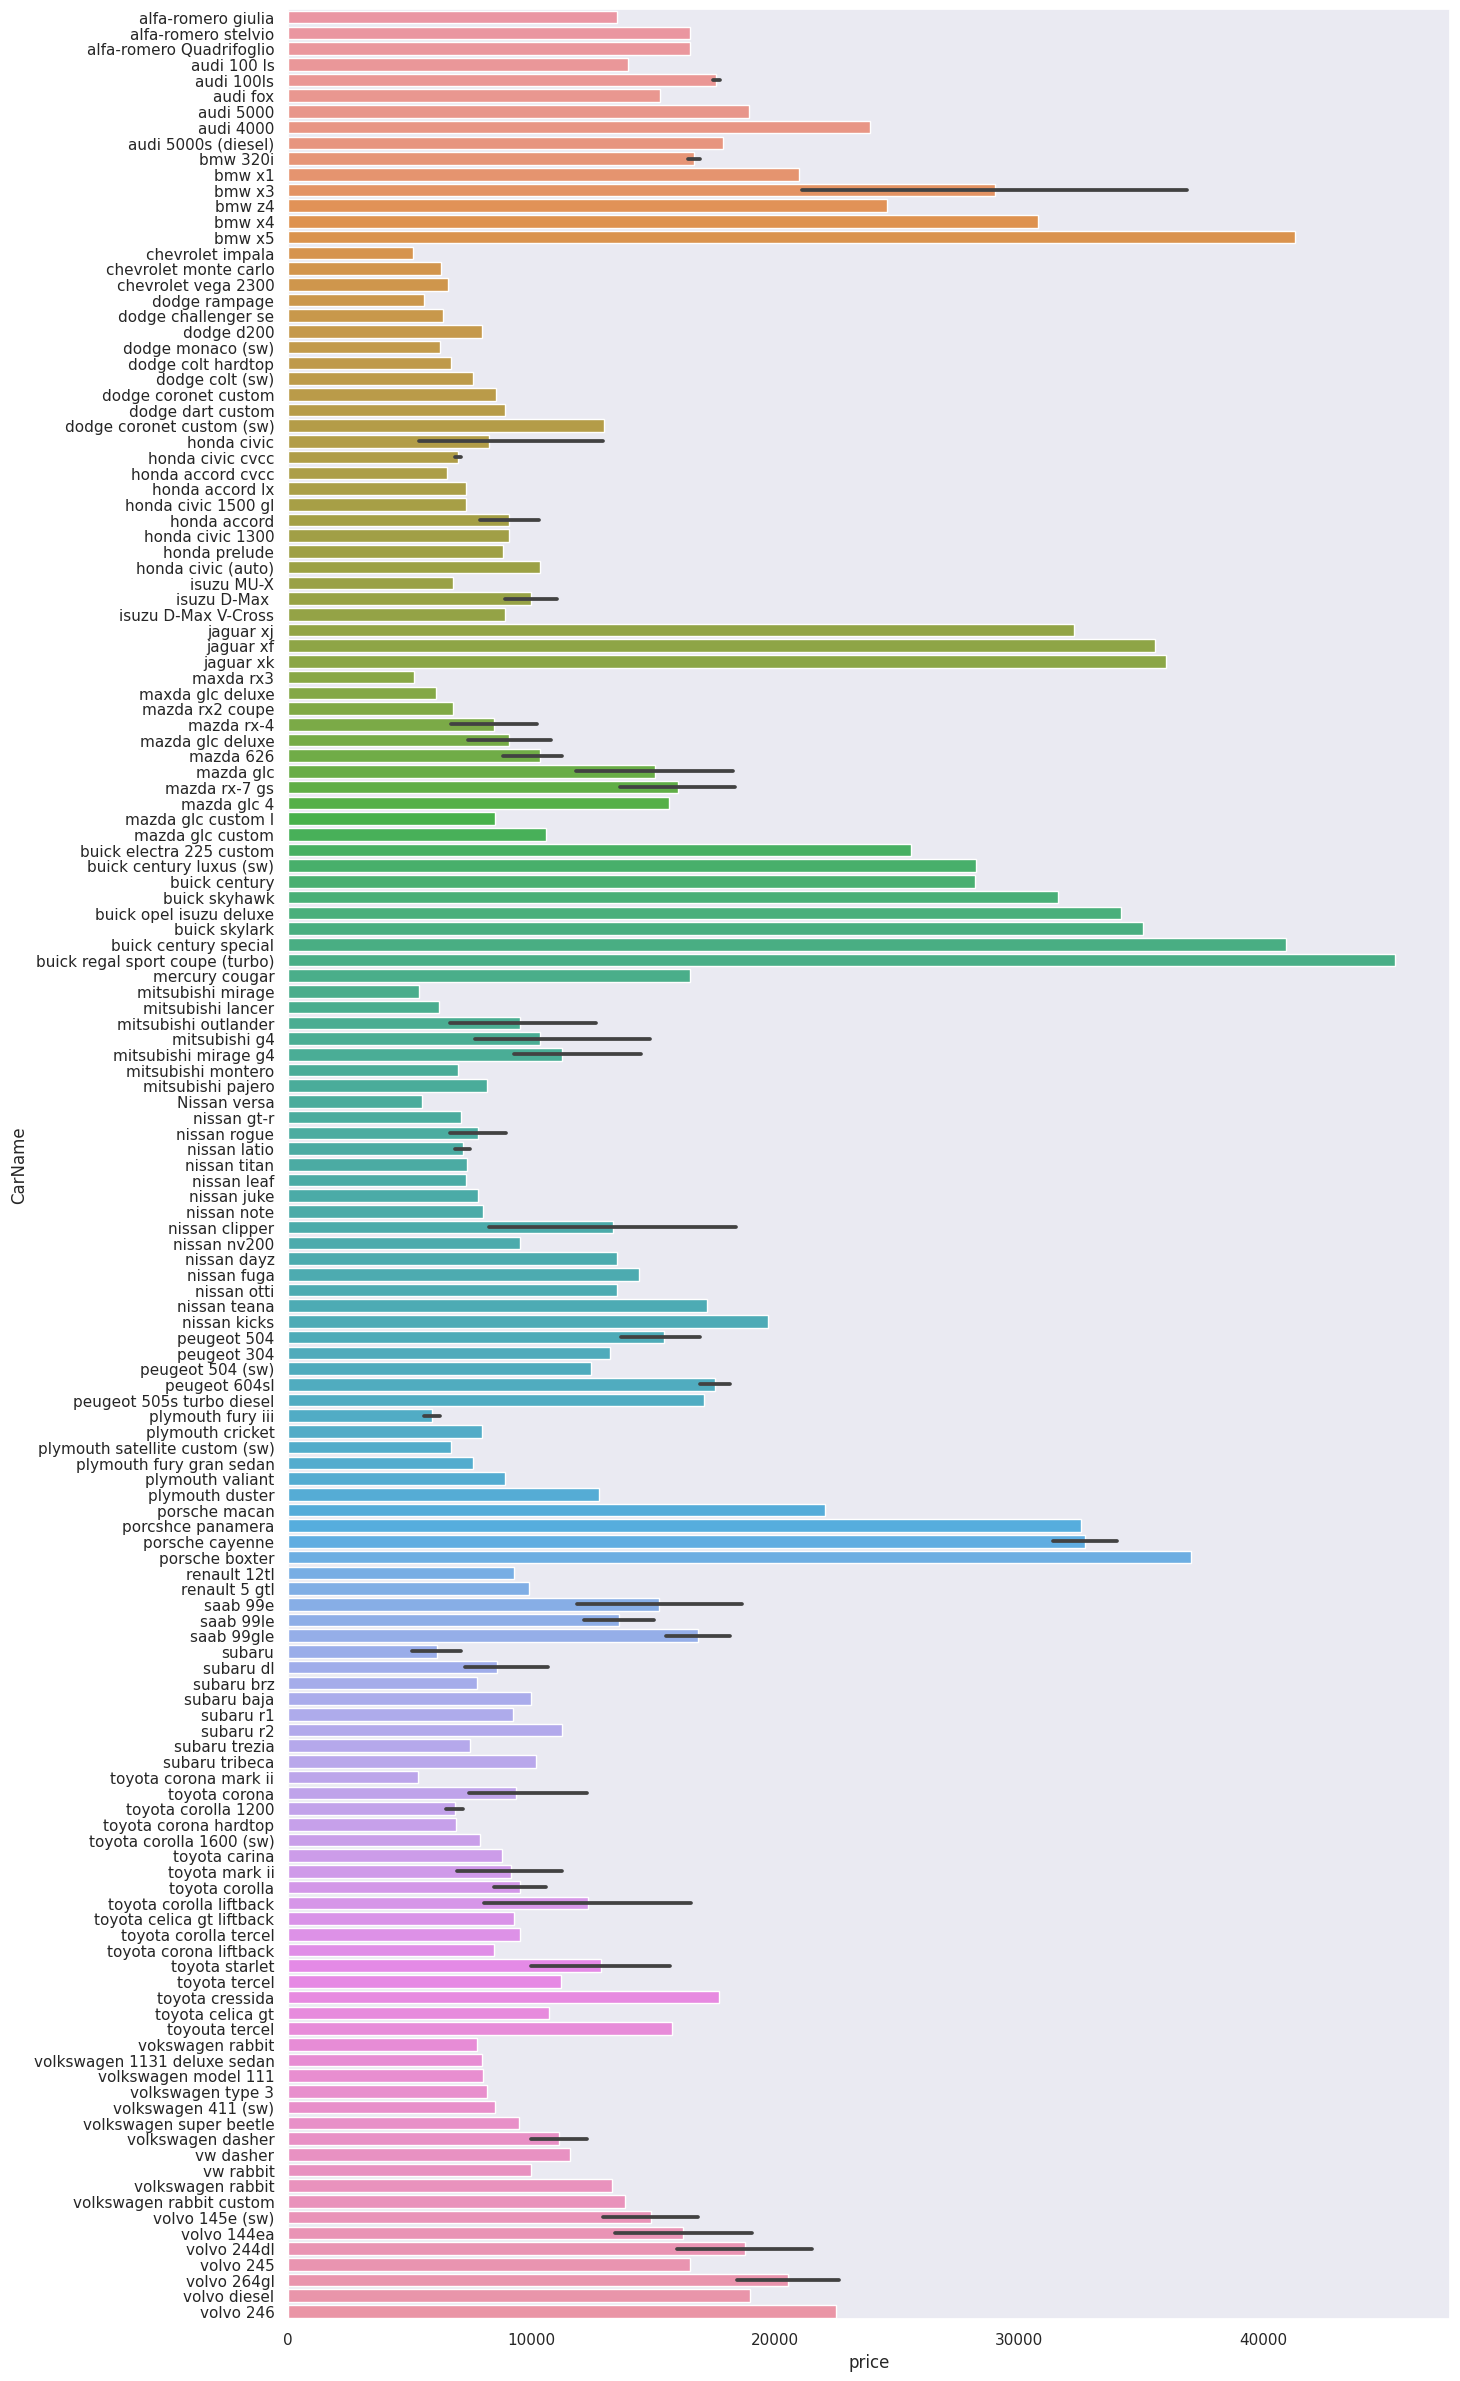

In [248]:
plt.subplots(1,figsize=(15,30))
sns.barplot(data,x='price',y='CarName')
plt.show()

# Data Preprossing

In [249]:
data.head(20)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000


In [250]:
sentence = data['CarName'][4]

sentence = "audi 100 ls"

pattern = r"(100)\s"
replacement = r"\1"

new_sentence = re.sub(pattern, replacement, sentence)
print(new_sentence)

audi 100ls


In [251]:
len(data['CarName'].unique())

147

In [252]:
duplicated_val = data[data.duplicated()]
duplicated_val.shape

(0, 25)

In [253]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [254]:
data.isnull().sum() / len(data) *100

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [256]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [257]:
for col in data.columns :
  lengthlst = []
  length = len(data[col].unique())
  lengthlst.append(data[col].unique())
  if length < 10 :
    print(f"{col}:{length} :{lengthlst}")

symboling:6 :[array([ 3,  1,  2,  0, -1, -2])]
fueltype:2 :[array(['gas', 'diesel'], dtype=object)]
aspiration:2 :[array(['std', 'turbo'], dtype=object)]
doornumber:2 :[array(['two', 'four'], dtype=object)]
carbody:5 :[array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)]
drivewheel:3 :[array(['rwd', 'fwd', '4wd'], dtype=object)]
enginelocation:2 :[array(['front', 'rear'], dtype=object)]
enginetype:7 :[array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)]
cylindernumber:7 :[array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)]
fuelsystem:8 :[array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)]


In [258]:
def Maping(Data,dataMaping):
  Data = Data.map(dataMaping)
  return Data

In [259]:
fueltypeMap = {'gas' : 0,
               'diesel' : 1
              }
data['fueltype'] = Maping(data['fueltype'],fueltypeMap)


aspirationMap = { 'std' : 0,
                  'turbo' : 1
                }
data['aspiration'] = Maping(data['aspiration'],aspirationMap)


doornumberMap = {'two' : 0,
                 'four' : 1
                }

data['doornumber'] = Maping(data['doornumber'],doornumberMap)


carbodyMaping ={'convertible' :0,
                'hatchback':1,
                'sedan':2,
                'wagon':3,
                'hardtop' :4
                }

data['carbody'] = Maping(data['carbody'],carbodyMaping)


drivewheelMaping = {'rwd':0,
                    'fwd':1,
                    '4wd':2}

data['drivewheel'] = Maping(data['drivewheel'],drivewheelMaping)


enginelocationMaping = {'front':0,
                        'rear':1}

data['enginelocation'] = Maping(data['enginelocation'],enginelocationMaping)


In [260]:
def Labeling(data):
  Encoding = LabelEncoder()
  data = Encoding.fit_transform(data)
  return data

In [261]:
data['enginetype'] = Labeling(data['enginetype'])
data['cylindernumber'] = Labeling(data['cylindernumber'])
data['fuelsystem'] = Labeling(data['fuelsystem'])
data['CarName'] = Labeling(data['CarName'])

In [262]:
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,2,0,0,0,0,0,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,3,0,0,0,0,0,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,1,0,0,0,1,0,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,4,0,0,1,2,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,5,0,0,1,2,2,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,139,0,0,1,2,0,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,138,0,1,1,2,0,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,140,0,0,1,2,0,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0


# Data Modeling

In [263]:
X = data.iloc[:,:-1]
X

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,2,0,0,0,0,0,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,3,0,0,0,0,0,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
3,1,1,0,0,0,1,0,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
4,2,4,0,0,1,2,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
5,2,5,0,0,1,2,2,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,139,0,0,1,2,0,0,109.1,188.8,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
202,-1,138,0,1,1,2,0,0,109.1,188.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
203,-1,140,0,0,1,2,0,0,109.1,188.8,...,3,173,5,3.58,2.87,8.8,134,5500,18,23


In [264]:
y = data.iloc[:,-1:]
y

,price
car_ID,
1,13495.0
2,16500.0
3,16500.0
4,13950.0
5,17450.0
...,...
201,16845.0
202,19045.0
203,21485.0


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [266]:
models = [SVR(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor()]
modelsName = ['SVR','LinearRegression','GradientBoostingRegressor','RandomForestRegressor']

In [267]:
for x in range(len(models)):
  pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('Model',models[x])

  ])

  print(pipe.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('Model', SVR())], 'verbose': False, 'scaler': StandardScaler(), 'Model': SVR(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'Model__C': 1.0, 'Model__cache_size': 200, 'Model__coef0': 0.0, 'Model__degree': 3, 'Model__epsilon': 0.1, 'Model__gamma': 'scale', 'Model__kernel': 'rbf', 'Model__max_iter': -1, 'Model__shrinking': True, 'Model__tol': 0.001, 'Model__verbose': False}
{'memory': None, 'steps': [('scaler', StandardScaler()), ('Model', LinearRegression())], 'verbose': False, 'scaler': StandardScaler(), 'Model': LinearRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'Model__copy_X': True, 'Model__fit_intercept': True, 'Model__n_jobs': None, 'Model__positive': False}
{'memory': None, 'steps': [('scaler', StandardScaler()), ('Model', GradientBoostingRegressor())], 'verbose': False, 'scaler': StandardScaler(), 'Model': GradientBoostingRegressor(), 'scaler__copy

In [268]:
par_grid1 = {'Model__degree':[0,1,2,3,4,5],'Model__kernel':['rbf','linear','poly'],'Model__epsilon':[0.0001,0.001,0.01],'Model__C':[100,150,200,300,500,800,1000]}
par_grid2 = {'scaler__with_std':[True,False]}
par_grid3 = {'Model__criterion':['squared_error','friedman_mse'],'Model__learning_rate':[0.001,0.01,0.1]}
par_grid4 = {'Model__criterion':['friedman_mse','squared_error','poisson','absolute_error']}

params_grids =[par_grid1,par_grid2,par_grid3,par_grid4]

In [269]:
grid1 = []
grid2 = []
grid3 = []
grid4 = []
for x in range(len(models)):
  pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('Model',models[x])

  ])

  grid = GridSearchCV(
      estimator=pipe,
      param_grid=params_grids[x],
      cv=3

  )


  grids = [grid1,grid2,grid3,grid4]
  grids[x].append(grid)


  grid.fit(X_train,y_train)

  print(f"{modelsName[x]} has score {grid.best_score_*100} % and their parameter \n{grid.best_params_}\n")

SVR has score 83.71330021560888 % and their parameter 
{'Model__C': 150, 'Model__degree': 0, 'Model__epsilon': 0.0001, 'Model__kernel': 'linear'}

LinearRegression has score 81.44775934765933 % and their parameter 
{'scaler__with_std': False}

GradientBoostingRegressor has score 91.95975731283266 % and their parameter 
{'Model__criterion': 'squared_error', 'Model__learning_rate': 0.1}

RandomForestRegressor has score 93.82310962860748 % and their parameter 
{'Model__criterion': 'poisson'}



In [275]:
training_results = []

testing_results = []

def evaluate_model(Model,X_train,y_train,X_test,y_test):
  train_Pred = Model.predict(X_train)
  test_Pred = Model.predict(X_test)
  train_acc = r2_score(y_train,train_Pred)
  test_acc = r2_score(y_test,test_Pred)
  return test_Pred , train_acc , test_acc

In [276]:
for models in grids:
  x = 0
  test_Pred , train_acc , test_acc = evaluate_model(models[x],X_train,y_train,X_test,y_test)
  x = x + 1
  training_results.append(train_acc)
  testing_results.append(test_acc)

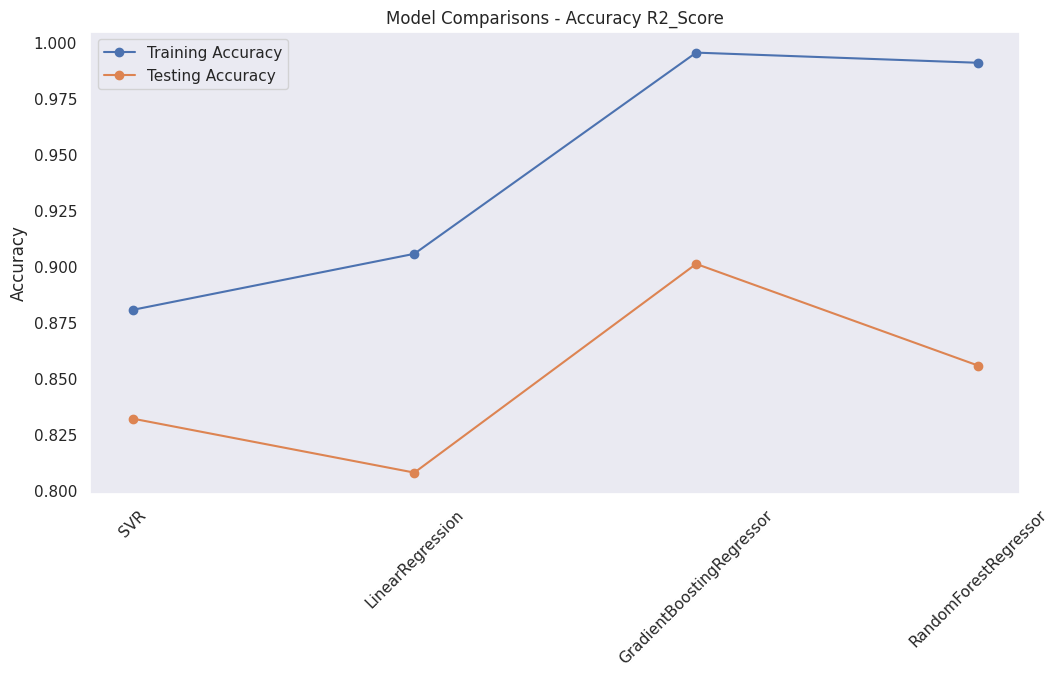

In [277]:
plt.figure(figsize=(12,6))
plt.plot(modelsName, training_results, 'o-', label="Training Accuracy")
plt.plot(modelsName, testing_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"Model Comparisons - Accuracy R2_Score")
plt.show()